<a href="https://colab.research.google.com/github/Ikhwan22/tugasBisnisCerdas3/blob/main/pertemuan3DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import cv2

from google.colab import files
import io

# Melakukan Upload File Iris Dataset

In [2]:
uploaded = files.upload()

Saving iris.data to iris.data


# Membaca File Iris Dataset dengan Pandas Dataframe

In [3]:
iris = pd.read_csv(io.BytesIO(uploaded["iris.data"]))

In [4]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

iris = iris.set_axis(FEATURE_NAMES, axis=1)
X = iris

I'd amend this by adding the column names inline, because the above approach removes the first row (making it 149 instead of 150)

In [5]:
X[:150]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica



* Iris-setosa	= 0
* Iris-versicolor	= 1
* Iris-virginica	= 2



In [6]:
conditions = [
              iris['Class'].eq('Iris-setosa'),
              iris['Class'].eq('Iris-versicolor'),
              iris['Class'].eq('Iris-virginica')
              ]
choices = [0, 1, 2]
iris['Class'] = np.select(conditions, choices)

In [7]:
iris['Class'] = iris['Class'].astype('int')
y = np.asarray(iris['Class'])

# Menampilkan Array Fitur Tipe/Class Spesies

In [8]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=96218061)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (96, 5) (96,)
Test set: (53, 5) (53,)


# Entropy

In [10]:
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
export_graphviz(model_entropy, 'tree.dot', feature_names = FEATURE_NAMES)

In [16]:
!dot -Tpng tree.dot -o tree_entropy.png

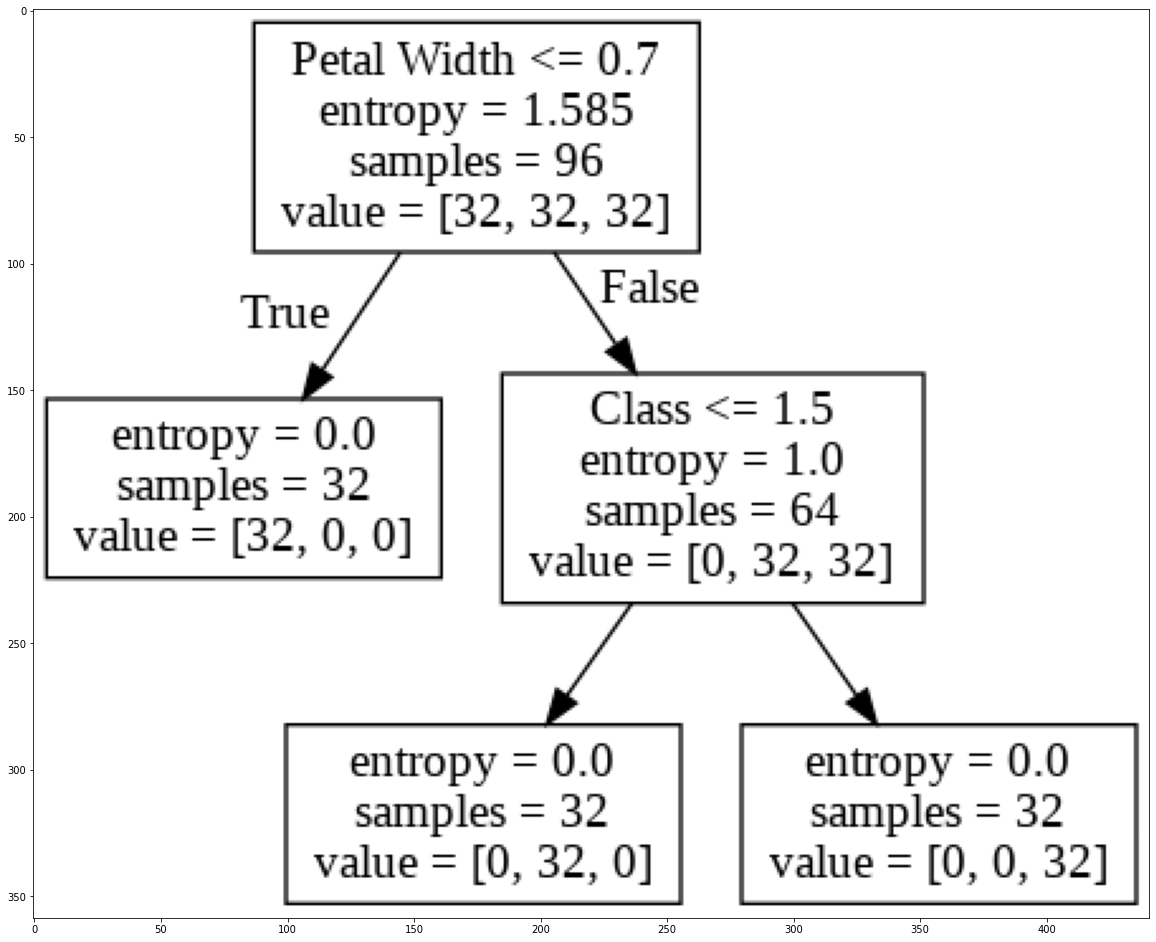

In [17]:
img = cv2.imread('tree_entropy.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [26]:
predicted_tree_entopy = model_entropy.predict(X_test)

In [27]:
metrics.accuracy_score(y_test, predicted_tree_entopy)

1.0

In [28]:
print(classification_report(y_test, predicted_tree_entopy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



# Gini

In [18]:
model_gini = DecisionTreeClassifier(criterion="gini", max_depth = 6)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
export_graphviz(model_gini, 'tree.dot', feature_names = FEATURE_NAMES)

In [20]:
!dot -Tpng tree.dot -o tree_gini.png

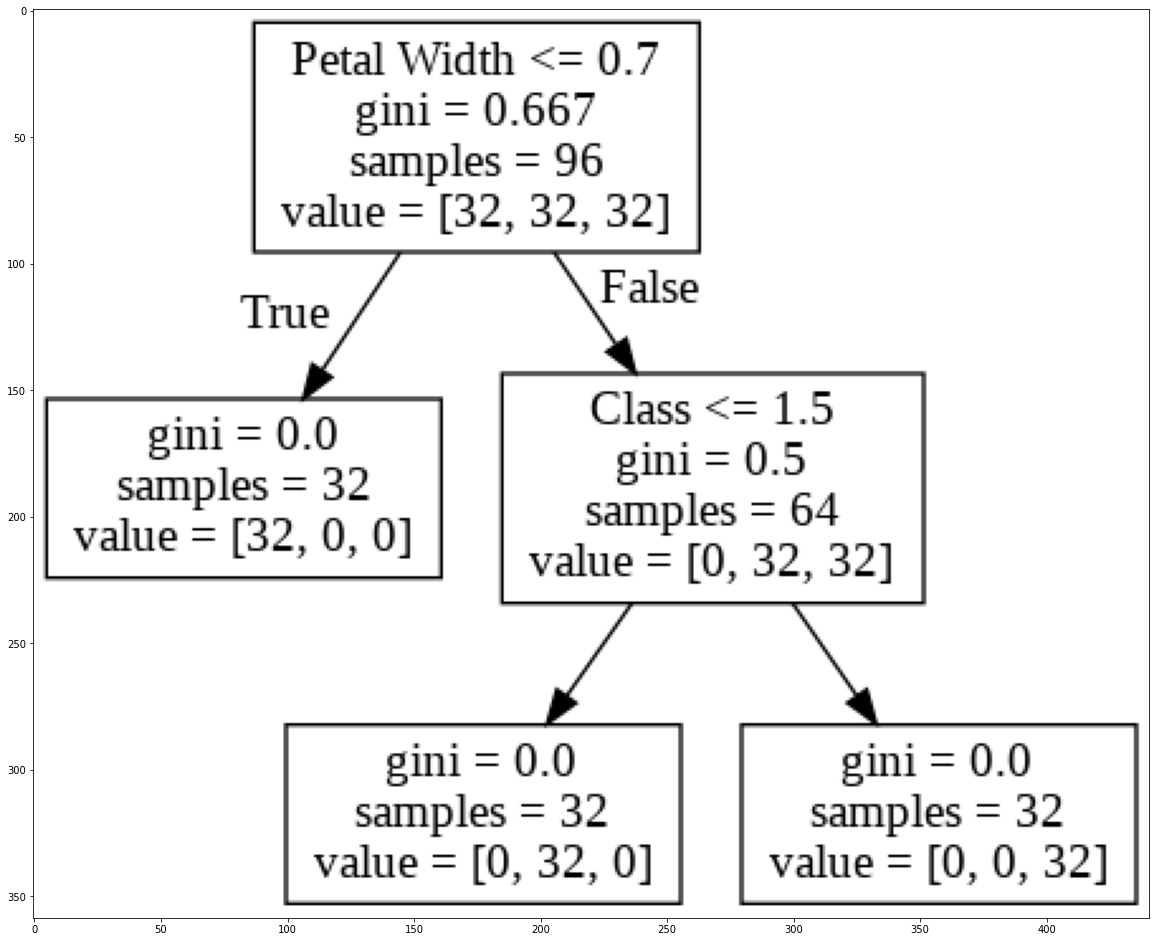

In [21]:
img = cv2.imread('tree_gini.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [29]:
predicted_tree_gini = model_gini.predict(X_test)

In [30]:
metrics.accuracy_score(y_test, predicted_tree_gini)

1.0

In [31]:
print(classification_report(y_test, predicted_tree_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

